## Question 1 ##

#### A - List of activities that I plan to do in Seoul ####

|                 Activity                 |                                                                                                               Why it's interesting                                                                                                               |                                                                 Subtasks required for the activity                                                                |
|:----------------------------------------:|:------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------:|:-----------------------------------------------------------------------------------------------------------------------------------------------------------------:|
|      Going to the mosque for prayers     | One aspect that is   always nice to find in a country is <br>people you can bond over with your similarities and I feel <br>a big part of that is your religion and so going to   <br>the mosque is something that increases your communal bond. |                              -Taking a shower<br>-Wearing traditional clothes<br>-Putting money into my t-money card for the bus ride                             |
|          Prepare for CS Classes          |                                      Having all of my   classes in one day, I have to <br>set aside a specific amount of time in a day to   <br>just focus on finishing up the preparation of those classes.                                     |                 -Inform people around me about being quiet<br>-Take out and connect my graphics tablet<br>-Do readings and PCW for all the classes                |
|         Take classes for the day         |                                                             After preparing for the classes, there's   <br>4.5 hours in the day that I have to allot <br>to taking the actual classes                                                            |                            -Clearing up any possible tech issues beforehand<br>-Revise notes for the class<br>-Take notes during class                            |
|                Morning Jog               |                                                               Coming into Seoul, I wanted to become a   <br>bit more healthy and start going out for a <br>jog early in the morning                                                              |                           -Wake up at 7am<br>-Take a cold shower<br>-Change into my tracksuit<br>-Find a new route to jog along on Naver                          |
|         Dinner with   someone new        |              With the small and amazing community   <br>that Minerva has, we have an amazing opportunity <br>to get to know people from   so many different backgrounds <br>and I feel as if I should be taking advanatage   of this             | -Message someone I want to get to know on telegram<br>-Plan a potential café to visit<br>-Figure out the timings for when we're both free<br>-Go to the bus stop  |
|   Hiking up to Namsan tower at midnight  |                                     Namsan tower has become a sort of rite   <br>of passage for Minervan students in Seoul <br>and doing a midnight group hike up   to the <br>tower sounds like a fun time.                                     |                              -Put money into my t-money card<br>-Filling up snack/water supplies just in case<br>-Charging my camera                              |
| Getting skincare products for my sisters |                                                    I have 3 elder sisters and coming into   <br>Seoul, I was set out into a mission to <br>bring them skincare products from the   <br>region                                                    |                      -Put money into my t-money card<br>-Take the bus to the big Olive Garden in Myeong-dong<br>-Shop for the products at OG                      |
|          Swim at Eurwangni Beach         |                                                                  Living so close to the ocean, I don't   <br>want to miss this opportunity to go to <br>amazing beaches and swim                                                                 |                              -Get changed into swimming gear<br>-Fill up my T-money card<br>-Take the 9500/1500 bus towards the beach                             |

#### B ####

To store the information for each, by referencing the code we were given in class 5.2, I'll use a task object with attributes task_id,description,duration,dependencies,priority,status, time_constraint and a Boolean that tells me whether it is time constrained. Here, besides the self-explanatory variables, we use dependencies to know which sub-tasks a task is dependent on before it can be succesfully completed. Furthermore, with the use of the time constraint variable, we know whether the task needs to be done at a specific time and are able to use that information to plan out the day accordingly.

#### C ####

For the working of the scheduler, a priority queue works best because while alleviating the need for constant sorting that would be required in sorted lists, it allows us to accurately know which task is supposed to be performed just by ensuring that the max/min heap property for the root is maintained. This allows for quick calculations and easy insertion of new items into our task-scheduler.

For the priority value of each task, I have depended on the user to know the general priority level of the task that they want to do as a base which gets inserted as an attribute of the task that they want to do. Furthermore, to augment these priorities, I identify how some situations require them to be done by a certain period (such as with constrained tasks) and in order to account for those situations, I have made it so those items get prioritized over others as the time to do them decreases.

## Question 2 ##

#### A -Python  Activity scheduler ####

In [1]:
'''Referenced from the code used in class for session 4.2'''

class MaxHeapq:
    '''
    A Heap data structure that maintains the max heap property, that is, each child element must be smaller than its parent
    element
    '''
    
    def __init__(self):    
        self.heap = []
        self.heap_size  = 0
        
    def left(self, i): # Returns the index of the first child of a parent
        return 2 * i + 1
    
    def right(self, i):# Returns the index of the second child of a parent
        return 2 * i + 2
     
    def parent(self, i): # Returns the index of the parent for a child
        return (i - 1)//2
    
    def maxk(self): #Returns the root element within the heap
        return self.heap[0]  
    
    def heappush(self, key): # Adds a new element to the heap while maintaining the heap property
        self.heap.append(-float("inf"))
        self.increase_key(self.heap_size,key)
        self.heap_size+=1
        
        
    def increase_key(self, i, key): #Helps in increasing the key value for an element in the heap and turns the result back into
                                    #a valid max heap
       
        if key.priority < self.heap[i]:
            raise ValueError('new key is smaller than the current key')
        self.heap[i] = key
        while i > 0 and self.heap[self.parent(i)].priority < self.heap[i].priority:
            j = self.parent(i)
            holder = self.heap[j]
            self.heap[j] = self.heap[i]
            self.heap[i] = holder
            i = j    
            
       
    def heapify(self, i): #Puts a selected element into a place in the heap where it obeys the max property

        l = self.left(i)
        r = self.right(i)
        heap = self.heap
        if l <= (self.heap_size-1) and heap[l].priority>heap[i].priority:
            largest = l
        else:
            largest = i
        if r <= (self.heap_size-1) and heap[r].priority > heap[largest].priority:
            largest = r
        if largest != i:
            heap[i], heap[largest] = heap[largest], heap[i]
            self.heapify(largest)

    def heappop(self): #Removes the root element and makes the resulting heap a valid max heap

        if self.heap_size < 1:
            raise ValueError('Heap underflow: There are no keys in the priority queue ')
        maxk = self.heap[0]
        self.heap[0] = self.heap[-1]
        self.heap.pop()
        self.heap_size-=1
        self.heapify(0)
        return maxk
    
    
class MinHeapq(MaxHeapq):
    '''
    Same idea as a heap but the property is instead that each child must by larger than the parent'''
    
    
    def heappush(self, key): 
        self.heap.append(float("inf"))
        self.decrease_key(self.heap_size,key)
        self.heap_size+=1
        
    
    def decrease_key(self, i, key): 

        if key.time_constraint > self.heap[i]:
            raise ValueError('new key is larger than the current key')
        self.heap[i] = key
        while i > 0 and self.heap[self.parent(i)].time_constraint > self.heap[i].time_constraint:
            j = self.parent(i)
            holder = self.heap[j]
            self.heap[j] = self.heap[i]
            self.heap[i] = holder
            i = j
            
    def heapify(self, i):

        l = self.left(i)
        r = self.right(i)
        heap = self.heap
        if l <= (self.heap_size-1) and heap[l].time_constraint<heap[i].time_constraint:
            smallest = l
        else:
            smallest = i
        if r <= (self.heap_size-1) and heap[r].time_constraint < heap[smallest].time_constraint:
            smallest = r
        if smallest != i:
            heap[i], heap[smallest] = heap[smallest], heap[i]
            self.heapify(smallest)
            
    def heappop(self):

        if self.heap_size < 1:
            raise ValueError('Heap underflow: There are no keys in the priority queue ')
        mink = self.heap[0]
        self.heap[0] = self.heap[-1]
        self.heap.pop()
        self.heap_size-=1
        self.heapify(0)
        return mink        
            
    def mink(self):
        return self.heap[0]

In [8]:
'''Referenced from code used in class in session 5.2'''

class Task:
    '''
    Creates the task object that has stores the various properties of a task which needs to be performed in a form
    that makes the information easy to access from within the object'''
    
    def __init__(self,task_id,description,duration,dependencies,priority,status="N", time_constraint = 1500):
        self.id= task_id
        self.description=description
        self.duration=duration
        self.dependencies=dependencies
        self.priority = priority
        self.status=status
        self.is_time_constrained = time_constraint != 1500 #Using the dummy value for time_constraint to add a Boolean
        self.time_constraint = time_constraint
        
    def __repr__(self):
        '''
        This defines the representation of the task when it is called on to by python'''
        
        if self.is_time_constrained:
            return f"{self.description} - id: {self.id}\n \tDuration:{self.duration}\n\tDepends on: {self.dependencies}\n\t"\
        f"Status: {self.status}\n\tPriority: {self.priority}\n\tIt has a time constraint at:"\
        f" {self.format_time(int(self.time_constraint))}"
        else:
            return f"{self.description} - id: {self.id}\n \tDuration:{self.duration}\n\tDepends on: {self.dependencies}\n\t"
        f"Status: {self.status}\n\tPriority: {self.priority}"
        
    def __lt__(self, other):
        '''
        This defines the behavior of the task when you're doing the function Task A < Task B which will in turn compare their
        priorities'''
        return self.priority < other.priority
    
    def format_time(self, time):
        return f"{time//60}h{time%60:02d}"
    
class TaskScheduler(
):
    '''
    Creates the task scheduler object initialized with the help of the task object obtained above and contains tools that help
    in manipulating the list of task objects to be able to identify the optimum way in scheduling the tasks
    '''
    
    NOT_STARTED ='N'
    IN_PRIORITY_QUEUE = 'I'
    COMPLETED = 'C'
    
    def __init__(self, tasks):
        '''
        Two Heaps are initialized here to symbolize the priority queue and also the constrained queue as a separate object
        since in theory, tasks with time constraints would have infinite priorities at their constrained time which makes it
        easier to look at both separately'''
        
        self.tasks = tasks
        self.priority_queue = MaxHeapq()
        self.constrained_queue = MinHeapq()
        
    def print_self(self):
        print('Input List of Tasks')
        for t in self.tasks:
            print(t)            
            
    def remove_dependency(self, task_id):
        
        '''
        For any given task that's been performed, this helps in removing that task from any other tasks dependencies so that
        the algorithm gets the okay-to-go sign that it can start doing that task.'''

        for t in self.tasks:
            if t.id != task_id and task_id in t.dependencies:
                t.dependencies.remove(task_id)  
                
        for t in self.constrained_queue.heap:
            if t.id != task_id and task_id in t.dependencies:
                t.dependencies.remove(task_id)  
            
    def get_tasks_ready(self):
        
        '''
        This method looks at any present tasks in the main task list without dependencies and puts them into the priority
        queue so the algorithm can start recommending the order in which they should be done. This is the part where the
        tasks are separated into different heaps by virtue of their time_constraint status.'''

        for task in self.tasks:
            if task.status == self.NOT_STARTED and not task.dependencies: # If task has no dependencies and is not yet in queue
                task.status = self.IN_PRIORITY_QUEUE # Change status of the task
                if task.is_time_constrained:
                    self.constrained_queue.heappush(task)
                else:
                    self.priority_queue.heappush(task)
#             if task.is_time_constrained:
#                 self.constrained_queue.heappush(task)
                     
                   
    
    def check_unscheduled_tasks(self):
        '''
        This method checks to see if there are any tasks in the entire list that have yet to start'''
        for task in tasks:
            if task.status == self.NOT_STARTED:
                return True
        return False   
    
    def format_time(self, time):
        '''
        Conversion of the only minute (past the day) integer into a format of hours and minutes past the day, making it
        easier to read.'''
        
        return f"{time//60}h{time%60:02d}"
    
    def find_dependencies(self, task):
        '''
        This method parses through the dependencies of a single task and returns the ids of the tasks it is dependent on'''
        
        dependencies = []
        
        for dependency_id in task.dependencies:
            for task in self.tasks:
                if task.id == dependency_id:
                    dependencies.append(task)
#         print(dependencies)
        return dependencies
    
    def dependencencies_time_req(self, task):
        
        '''
        This method uses the dependencies of a task to calculate the amount of time it would be required to complete all of
        the dependencies'''
        
        min_time_required_for_dependencies = 0
  
        for dependency in self.find_dependencies(task):
            min_time_required_for_dependencies += dependency.duration
            
        return min_time_required_for_dependencies
            
    def can_you_do_dep(self,task, current_time):
        '''
        This method returns a Boolean telling the algorithm whether there is enough time before the task's constrained time 
        begins for its dependencies'''
        
        return task.time_constraint - current_time >= self.dependencencies_time_req(task)
    
    def task_prioritization(self, current_time):
        '''
        This method prioritizes tasks that are within the dependencies of time-constrained tasks. Alongisde, it looks at whether
        it is possible to complete all the dependencies in time and if it isn't possible than it removes that constrained task.
        '''
        
        
        for tasks in self.tasks:
                if tasks.is_time_constrained and len(self.find_dependencies(tasks))>0 :
                    if self.can_you_do_dep(tasks, current_time):
                        for dependency_id in self.find_dependencies(tasks):
                            for task in self.tasks:
                                if task.id == dependency_id:
                                    task.priority = 100

                    else:
                        bad_task = tasks
                        self.tasks.remove(bad_task)
                        print(f"Task {bad_task.id} can't be performed since there isn't enough time to complete all of"\
                              f"its dependencies.\n")
                        self.remove_dependency(bad_task.id)
                        
                        
        
    
    def run_task_scheduler(self, starting_time = 360):
        '''
        This is the main method that produces the output in the form of the prioritized task list and the time they'll be done
        by.
        It does this by initializing the heaps from the list of tasks after prioritization of the tasks on the basis of them
        being required for constrained tasks or not.
        Afterwards, it checks for the amount of time_constrained items and uses the first as a pivot point to base how much
        time it has left to do unconstrained tasks in between. After doing the unconstrained tasks, if there's no more tasks
        that can be done before the first time_constrained task comes, it immediately jumps to the time_constrained task and
        updates the resulting list of tasks accordingly.
        Other than that, it also keeps an account of whether a constrained task can even be feasibly done and tells the user.'''
        
        current_time = starting_time
        while self.check_unscheduled_tasks() or self.priority_queue.heap_size != 0 or self.constrained_queue.heap_size != 0:
            
            self.task_prioritization(current_time)
            self.get_tasks_ready()  
            
            
            if self.constrained_queue.heap_size > 0:
                
                if len(self.find_dependencies(self.constrained_queue.mink())) > 0:
                    time_before_constraint = self.constrained_queue.mink().time_constraint - current_time - \
                    self.dependencencies_time_req(self.constrained_queue.mink())
                
                time_before_constraint = self.constrained_queue.mink().time_constraint - current_time
                
                while time_before_constraint >= 0:
                    popped_stuff = []
                    should_I_pop_it = True
                    get_me_out_of_this_loop = False
                    
                    # This while loop checks for whether there's time left before the next time_constrained task
                    
                    
                    if self.priority_queue.heap_size > 0:
                        while self.priority_queue.maxk().duration > time_before_constraint:
                            dummy_pop = self.priority_queue.heappop()
                            popped_stuff.append(dummy_pop)
                            if len(self.priority_queue.heap) == 0:
                                should_I_pop_it = False
                                break
                        # This while loop finds the first item in the priority queue that can be done in the time left

                        if should_I_pop_it:

                            #Using information from the Boolean we know when there's a appropriate task and we do that task
                            #and we subtract that task's duration from the time left to get new time left
                            
                            task = self.priority_queue.heappop()
                            print(f"⏰Simple Scheduler at time {self.format_time(current_time)} started executing task {task.id} that takes {task.duration} mins")
                            current_time += task.duration
                            time_before_constraint -= task.duration 
                            print(f"✅ Completed Task {task.id} - '{task.description}' at time {self.format_time(current_time)}\n") 
                            self.remove_dependency(task.id)

                            task.status = self.COMPLETED
                            
                            old_size = self.constrained_queue.heap_size
                            
                            self.get_tasks_ready()
                            
                            time_before_constraint = self.constrained_queue.mink().time_constraint - current_time
#                             if old_size != self.constrained_queue.heap_size:
#                                 time_
           
                    #When there's no tasks that fall within the time, we go through this conditional and do the next
                    #constrained task at it's time. If that's the final task then we use the boolean get_me_out_of_this_loop
                    #to get out of the loop
                    
                    if self.priority_queue.heap_size == 0 and self.constrained_queue.heap_size > 0:
                        current_time = self.constrained_queue.mink().time_constraint
                        if len(self.constrained_queue.heap) > 0 :       
                            task = self.constrained_queue.heappop()
                            print(f"⏰Simple Scheduler at time {self.format_time(current_time)} started executing task {task.id} that takes {task.duration} mins")
                            current_time += task.duration            
                            print(f"✅ Completed Task {task.id} - '{task.description}' at time {self.format_time(current_time)}\n") 
                            self.remove_dependency(task.id)
                            task.status = self.COMPLETED
                            
                            self.get_tasks_ready()

                        if self.constrained_queue.heap_size == 0:
                            get_me_out_of_this_loop = True
                            
                        if not get_me_out_of_this_loop:
                            time_before_constraint = self.constrained_queue.mink().time_constraint - current_time
                            #Updating the time between constraints to the next constrained task
                        

                    for tasks in popped_stuff:
                        self.priority_queue.heappush(tasks)
                        #Since we keep in mind the priority of tasks when we do them, we have to take them out of the heap
                        #through heappop. To put them back in again, we use this for loop over the stored list (popped_stuff)

                    if get_me_out_of_this_loop:
                        break
                    
            
            else:
                
                #This just does all the non-constrained tasks in order of priority if there's no constrained tasks
                if len(self.priority_queue.heap) > 0 :       
                            task = self.priority_queue.heappop()
                            print(f"⏰Simple Scheduler at time {self.format_time(current_time)} started executing task {task.id} that takes {task.duration} mins")
                            current_time += task.duration            
                            print(f"✅ Completed Task {task.id} - '{task.description}' at time {self.format_time(current_time)}\n") 
                            self.remove_dependency(task.id)
                            task.status = self.COMPLETED
            
            if current_time > 1440:
                #simulating the end of the day
                current_time = 0

                    
                    
                
                
            
        total_time = current_time - starting_time
        print(f"🏁 Completed all planned tasks in {total_time//60}h{total_time%60:02d}min")

#### B ####

Example case to test the algorithm

In [11]:
tasks = [
    Task(0, 'Going to the Mosque', 30, [1,2,3], 40, time_constraint = 780), 
    Task(1, 'Taking a shower', 10, [], 20), 
    Task(2, 'Wearing traditional clothes', 5, [1], 15), 
    Task(3, 'Putting money into t-money card for the bus', 15, [], 30), 
    Task(4, 'Prepare for CS classes', 10, [5,6,7], 40), 
    Task(5, 'Inform people around me about being quiet', 2, [], 5), 
    Task(6, 'Take out and connect my graphics tablet', 2, [], 4),
    Task(7, 'Do readings and PCW for all the classes', 120, [6], 50),
    Task(8, 'Take classes for the day', 180, [9,10,11,4], 70, time_constraint = 1020), 
    Task(9, 'Clearing up any possible tech issues beforehand', 2, [], 2 ),
    Task(10, 'Revise notes for the class', 20, [4], 25 ),
    Task(11, 'Take notes during class', 2, [10], 30 ), 
    Task(12, 'Morning jog', 30, [13,14],40 ),
    Task(13, 'Wake up at 7am', 5, [], 50, time_constraint = 420 ),
    Task(14, 'Take a cold shower', 15 , [13], 15 ), 
    Task(15, 'Change into my tracksuit', 5 , [14], 10 ),
    Task(16, 'Find a new route to jog along on Naver', 3, [], 5),
    Task(17, 'Dinner with somone new', 30, [18,19,20,21], 20 ), 
    Task(18, 'Message some I want to get to know on telegram', 2, [], 10 ),
    Task(19, 'Plan a potential cafe to visit',5 , [18], 12 ),
    Task(20, "Figure out the timings for when we're both free",3 , [18,19],15 ), 
    Task(21, 'Go to the bus stop', 10, [], 16),
    Task(22, 'Hiking up to Namsan tower at midnight', 40, [3,24], 40, time_constraint = 1440 ),
    Task(23, 'Filling up snack/water supplies just in case', 10, [],10 ), 
    Task(24, 'Charging my camera', 10, [],40 ),
    Task(25, 'Getting skincare products for my sisters', 20, [3,26,27],30 ),
    Task(26, 'Take the bus to the big Olive Garden in Myeong-dong', 13, [], 20), 
    Task(27, 'Shop for the products at OG', 15, [26],12 ),
    Task(28, 'Swim at Eurwangni beach', 15, [3,29,30],14 ),
    Task(29, 'Get changed into swimming gear', 5, [], 12), 
    Task(30, 'Take the 9500/1500 bus towards the beach', 30, [], 30),]
    
task_scheduler = TaskScheduler(tasks)
task_scheduler.run_task_scheduler()



⏰Simple Scheduler at time 6h00 started executing task 24 that takes 10 mins
✅ Completed Task 24 - 'Charging my camera' at time 6h10

⏰Simple Scheduler at time 6h10 started executing task 3 that takes 15 mins
✅ Completed Task 3 - 'Putting money into t-money card for the bus' at time 6h25

⏰Simple Scheduler at time 6h25 started executing task 30 that takes 30 mins
✅ Completed Task 30 - 'Take the 9500/1500 bus towards the beach' at time 6h55

⏰Simple Scheduler at time 6h55 started executing task 29 that takes 5 mins
✅ Completed Task 29 - 'Get changed into swimming gear' at time 7h00

⏰Simple Scheduler at time 7h00 started executing task 13 that takes 5 mins
✅ Completed Task 13 - 'Wake up at 7am' at time 7h05

⏰Simple Scheduler at time 7h05 started executing task 1 that takes 10 mins
✅ Completed Task 1 - 'Taking a shower' at time 7h15

⏰Simple Scheduler at time 7h15 started executing task 26 that takes 13 mins
✅ Completed Task 26 - 'Take the bus to the big Olive Garden in Myeong-dong' at t

## Question 3 ##

#### A - Changes needed to the code ####

Since this version of the code only runs one instance of a task at a time, there would first be a need to define when the algorithm is in multitasking mode and when it isn't. This could be accomplished with a Boolean.

In a general implementation where all multitaskable tasks are treated equal, one way would be to run two instances of the heappop() procedure and take out the resulting tasks which can be done in tandem. However, this wouldn't be so simple since it would require the code to first go through the list of tasks in order of priority and find the first item that could be used as an additional task to multitask with. Furthermore, within this implementation, we would also require that after the finishing of each task in multitask mode, it would need to check whether there's still time left for the longer task to finish which would, in theory, allow for more multitaskable tasks to be added along in tandem. This could be done through a recursive implementation whereby identifying whether there's enough time to add the second task, the code would do the shorter task and repeat the process until it reaches the base case of there being no more multitaskable tasks or none that would fit within the duration.

This would then allow the algorithm to go out of multitask mode and continue as normal until it finds the next task that needs to be done.

However, as I noted with difficulty in trying to implement this with the complexity of the double heap of the constrained and priority queues, I instead opted for a more simplistic implementation where only specific tasks can be multitasked with each other. This would allow for only two tasks to be done at a time in a manner where after one completes, you don't automatically add on the other and instead just immediately go to the end.


#### B - Constraint handling ####

One of the most difficult parts of the process was to account for all the edge cases especially with the implementation of the constraint times.
Firstly, by being wrapped in the original algorithm, it would still be able to account for the extra priority that needs to be given to time-sensitive tasks but alongside, when it would be in multitask mode, it would allow for greater tasks to be done at a time.
Within the more simplistic implementation, more of the constraints could be accounted for where since the multitaskable nature of the task was being provided by the user in a manner where it was specific to the task, it would allow for more accurate predictions by the algorithm in giving a proper implementable routine.

## Question 2 ##

#### A1 - Complex generalizable code attempt ####

In [12]:
class MaxHeapq:
    def __init__(self):    
        self.heap = []
        self.heap_size  = 0
    def left(self, i):
        return 2 * i + 1
    def right(self, i):
        return 2 * i + 2
    def parent(self, i):
        return (i - 1)//2
    def maxk(self):
        if self.heap_size > 0:
            return self.heap[0]
        else:
            return Task(0,0,0,0,0,0,multitaskable = False)      
    def heappush(self, key):      
        self.heap.append(-float("inf"))
        self.increase_key(self.heap_size,key)
        self.heap_size+=1
    def increase_key(self, i, key): 
       
        if key.priority < self.heap[i]:
            raise ValueError('new key is smaller than the current key')
        self.heap[i] = key
        while i > 0 and self.heap[self.parent(i)].priority < self.heap[i].priority:
            j = self.parent(i)
            holder = self.heap[j]
            self.heap[j] = self.heap[i]
            self.heap[i] = holder
            i = j    
            
       
    def heapify(self, i):

        l = self.left(i)
        r = self.right(i)
        heap = self.heap
        if l <= (self.heap_size-1) and heap[l].priority>heap[i].priority:
            largest = l
        else:
            largest = i
        if r <= (self.heap_size-1) and heap[r].priority > heap[largest].priority:
            largest = r
        if largest != i:
            heap[i], heap[largest] = heap[largest], heap[i]
            self.heapify(largest)

    def heappop(self):

        if self.heap_size < 1:
            raise ValueError('Heap underflow: There are no keys in the priority queue ')
        maxk = self.heap[0]
        self.heap[0] = self.heap[-1]
        self.heap.pop()
        self.heap_size-=1
        self.heapify(0)
        return maxk
    
    
class MinHeapq(MaxHeapq):
    
    def heappush(self, key):   
        self.heap.append(float("inf"))
        self.decrease_key(self.heap_size,key)
        self.heap_size+=1
        
    
    def decrease_key(self, i, key): 

        if key.time_constraint > self.heap[i]:
            raise ValueError('new key is larger than the current key')
        self.heap[i] = key
        while i > 0 and self.heap[self.parent(i)].time_constraint > self.heap[i].time_constraint:
            j = self.parent(i)
            holder = self.heap[j]
            self.heap[j] = self.heap[i]
            self.heap[i] = holder
            i = j
            
    def heapify(self, i):

        l = self.left(i)
        r = self.right(i)
        heap = self.heap
        if l <= (self.heap_size-1) and heap[l].time_constraint<heap[i].time_constraint:
            smallest = l
        else:
            smallest = i
        if r <= (self.heap_size-1) and heap[r].time_constraint < heap[smallest].time_constraint:
            smallest = r
        if smallest != i:
            heap[i], heap[smallest] = heap[smallest], heap[i]
            self.heapify(smallest)
            
    def heappop(self):

        if self.heap_size < 1:
            raise ValueError('Heap underflow: There are no keys in the priority queue ')
        mink = self.heap[0]
        self.heap[0] = self.heap[-1]
        self.heap.pop()
        self.heap_size-=1
        self.heapify(0)
        return mink        
            
    def mink(self):
        
        if self.heap_size > 0:
            return self.heap[0]
        else:
            return Task(0,0,0,0,0,0,multitaskable = False)

In [13]:
class Task:

    def __init__(self,task_id,description,duration,dependencies,priority,status="N", time_constraint = 1500, multitaskable = False):
        self.id= task_id
        self.description=description
        self.duration=duration
        self.dependencies=dependencies
        self.priority = priority
        self.status=status
        self.is_time_constrained = time_constraint != 1500
        self.time_constraint = time_constraint
        self.is_multitaskable = multitaskable
        
    def __repr__(self):
        if self.is_time_constrained:
            return f"{self.description} - id: {self.id}\n \tDuration:{self.duration}\n\tDepends on: {self.dependencies}\n\tStatus: {self.status}\n\tPriority: {self.priority}\n\tIt has a time constraint at: {self.format_time(int(self.time_constraint))}"
        else:
            return f"{self.description} - id: {self.id}\n \tDuration:{self.duration}\n\tDepends on: {self.dependencies}\n\tStatus: {self.status}\n\tPriority: {self.priority}"
    def __lt__(self, other):
        return self.priority < other.priority
    
    def format_time(self, time):
        return f"{time//60}h{time%60:02d}"
    
class TaskScheduler(
):

    NOT_STARTED ='N'
    IN_PRIORITY_QUEUE = 'I'
    COMPLETED = 'C'
    
    def __init__(self, tasks, current_time = 460):
        self.tasks = tasks
        self.priority_queue = MaxHeapq()
        self.constrained_queue = MinHeapq()
        self.current_time = current_time
        
    def print_self(self):
        print('Input List of Tasks')
        for t in self.tasks:
            print(t)            
            
    def remove_dependency(self, task_id):

        for t in self.tasks:
            if t.id != task_id and task_id in t.dependencies:
                t.dependencies.remove(task_id)  
                
        for t in self.constrained_queue.heap:
            if t.id != task_id and task_id in t.dependencies:
                t.dependencies.remove(task_id)  
            
    def get_tasks_ready(self):

        for task in self.tasks:
            if task.status == self.NOT_STARTED and not task.dependencies: # If task has no dependencies and is not yet in queue
                task.status = self.IN_PRIORITY_QUEUE # Change status of the task
                if task.is_time_constrained:
                    self.constrained_queue.heappush(task)
                else:
                    self.priority_queue.heappush(task)
#             if task.is_time_constrained:
#                 self.constrained_queue.heappush(task)
                     
                   
    
    def check_unscheduled_tasks(self):
        for task in tasks:
            if task.status == self.NOT_STARTED:
                return True
        return False   
    
    def format_time(self, time):
        return f"{time//60}h{time%60:02d}"
    
    def find_dependencies(self, task):
        
        dependencies = []
        
        for dependency_id in task.dependencies:
            for task in self.tasks:
                if task.id == dependency_id:
                    dependencies.append(task)
#         print(dependencies)
        return dependencies
    
    def dependencencies_time_req(self, task):
        
        min_time_required_for_dependencies = 0
  
        for dependency in self.find_dependencies(task):
            min_time_required_for_dependencies += dependency.duration
            
        return min_time_required_for_dependencies
            
    def can_you_do_dep(self,task, current_time):
        
        return task.time_constraint - self.current_time >= self.dependencencies_time_req(task)
    
    def task_prioritization(self, current_time):
        '''
        This method prioritizes tasks that are within the dependencies of time-constrained tasks. Alongisde, it looks at whether
        it is possible to complete all the dependencies in time and if it isn't possible than it removes that constrained task.
        '''
        
        
        for tasks in self.tasks:
                if tasks.is_time_constrained and len(self.find_dependencies(tasks))>0 :
                    if self.can_you_do_dep(tasks, self.current_time):
                        for dependency_id in self.find_dependencies(tasks):
                            for task in self.tasks:
                                if task.id == dependency_id:
                                    task.priority = 100

                    else:
                        bad_task = tasks
                        self.tasks.remove(bad_task)
                        print(f"Task {bad_task.id} can't be performed since there isn't enough time to complete all of its dependencies.\n")
                        self.remove_dependency(bad_task.id)
                        
                        
    def multi_run(self, task_1, task_2, is_task_1, is_task_2, current_time, multitasking = True):
        
        popped_stuff = []
        
        if not multitasking:
            return
        
        
        if self.priority_queue.heap_size == 0:
            return
        while not self.priority_queue.maxk().is_multitaskable: 
            dummy_pop = self.priority_queue.heappop()
            popped_stuff.append(dummy_pop)
            if len(self.priority_queue.heap) == 0:
                multitasking = False
                break
        
#         if (self.current_time + self.priority_queue.maxk().duration/2) < (self.current_time + max(task_1.duration, task_2.duration)):
        
        #print(self.priority_queue.heap)
        if not multitasking:
            if is_task_1:
                self.current_time += task_2.duration
                task_1.duration -= task_2.duration
                print(f"✅ Completed Task {task_2.id} - '{task_2.description}' at time {self.format_time(self.current_time)}\n")
                self.remove_dependency(task_2.id)
                task_2.status = self.COMPLETED
                is_task_2 = True
                self.get_tasks_ready()
            else:
                self.current_time += task_1.duration
                task_1.duration -= task_1.duration
                print(f"✅ Completed Task {task_1.id} - '{task_1.description}' at time {self.format_time(self.current_time)}\n")
                self.remove_dependency(task_1.id)
                task_1.status = self.COMPLETED
                is_task_1 = True
                self.get_tasks_ready()
                    
        else:
            if is_task_1:
                task_1 = self.priority_queue.heappop()
                print(f"Started doing Task {task_1.id} alongside Task {task_2.id} at time {self.format_time(self.current_time)}\n")

                if task_1.duration >= task_2.duration:
                    self.current_time += task_2.duration
                    task_1.duration -= task_2.duration
                    print(f"✅ Completed Task {task_2.id} - '{task_2.description}' at time {self.format_time(self.current_time)}\n")
                    self.remove_dependency(task_2.id)
                    task_2.status = self.COMPLETED
                    is_task_2 = True
                    self.get_tasks_ready()
                else:
                    self.current_time += task_1.duration
                    task_2.duration -= task_1.duration
                    print(f"✅ Completed Task {task_1.id} - '{task_1.description}' at time {self.format_time(self.current_time)}\n") 
                    is_task_1 = True
                    self.remove_dependency(task_1.id)
                    task_1.status = self.COMPLETED                    
                    self.get_tasks_ready()

            elif is_task_2:
                task_2 = self.priority_queue.heappop()
                print(f"Started doing Task {task_2.id} alongside Task {task_1.id} at time {self.format_time(self.current_time)}\n")

                if task_1.duration >= task_2.duration:
                    self.current_time += task_2.duration
                    task_1.duration -= task_2.duration
                    print(f"✅ Completed Task {task_2.id} - '{task_2.description}' at time {self.format_time(self.current_time)}\n")
                    self.remove_dependency(task_2.id)
                    task_2.status = self.COMPLETED
                    is_task_2 = True
                    self.get_tasks_ready()
                else:
                    self.current_time += task_1.duration
                    task_2.duration -= task_1.duration
                    print(f"✅ Completed Task {task_1.id} - '{task_1.description}' at time {self.format_time(self.current_time)}\n") 
                    is_task_1 = True
                    self.remove_dependency(task_1.id)
                    task_1.status = self.COMPLETED
                    is_task_1 = True
                    self.get_tasks_ready()


            for tasks in popped_stuff:
                    self.priority_queue.heappush(tasks)

            self.multi_run(task_1, task_2, is_task_1, is_task_2, self.current_time)
                
                    
                    
    
    def run_task_scheduler(self, starting_time = 460):
        self.current_time = starting_time
        while self.check_unscheduled_tasks() or self.priority_queue.heap_size != 0 or self.constrained_queue.heap_size != 0:
            
            self.task_prioritization(self.current_time)
            self.get_tasks_ready()  
            
            if self.constrained_queue.mink().is_multitaskable:
                           
                is_task_1 = True
                is_task_2 = True
                
                task_1 = Task(0,0,0,0,0,0,multitaskable = False)
                task_2 = Task(0,0,0,0,0,0,multitaskable = False)
                
                if self.constrained_queue.heap_size > 0:

                    time_before_constraint = self.constrained_queue.mink().time_constraint - self.current_time

                    while time_before_constraint >= 0:
                        popped_stuff = []
                        should_I_pop_it = True
                        get_me_out_of_this_loop = False

                        # This while loop checks for whether there's time left before the next time_constrained task


                        if self.priority_queue.heap_size > 0:
                            while self.priority_queue.maxk().duration > time_before_constraint:
                                dummy_pop = self.priority_queue.heappop()
                                popped_stuff.append(dummy_pop)
                                if len(self.priority_queue.heap) == 0:
                                    should_I_pop_it = False
                                    break
                    
                            # This while loop finds the first item in the priority queue that can be done in the time left

                            if should_I_pop_it:

                                #Using information from the Boolean we know when there's a appropriate task and we do that task
                                #and we subtract that task's duration from the time left to get new time left                      
                            
                                if self.priority_queue.maxk().is_multitaskable:
                                    
                                    task_1 = self.priority_queue.heappop()
                                    is_task_1 = False
                                    self.multi_run(task_1, task_2, is_task_1, is_task_2, self.current_time)
                                    
                                else:
                                    task_1 = self.priority_queue.heappop()
                                    is_task_1 = False
                                    print(f"⏰Simple Scheduler at time {self.format_time(self.current_time)} started executing task {task_1.id} that takes {task_1.duration} mins")
                                    self.current_time += task_1.duration
                                    time_before_constraint -= task_1.duration 
                                    print(f"✅ Completed Task {task_1.id} - '{task_1.description}' at time {self.format_time(self.current_time)}\n") 
                                    self.remove_dependency(task_1.id)
                                    task_1.status = self.COMPLETED
                                    self.get_tasks_ready()
                                    time_before_constraint = self.constrained_queue.mink().time_constraint - self.current_time


                        #When there's no tasks that fall within the time, we go through this conditional and do the next
                        #constrained task at it's time. If that's the final task then we use the boolean get_me_out_of_this_loop
                        #to get out of the loop

                        if self.priority_queue.heap_size == 0 and self.constrained_queue.heap_size > 0:
                            self.current_time = self.constrained_queue.mink().time_constraint
                            if len(self.constrained_queue.heap) > 0 :
           
                                task_1 = self.constrained_queue.heappop()
                                is_task_1 = False
                                self.remove_dependency(task_1.id)
                                task_1.status = self.COMPLETED
                    
                                if self.priority_queue.heap_size == 0 and len(popped_stuff) == 0:
                                    print(f"There's no tasks to multitask with, thus task {task_1.id} should be done at {self.format_time(self.current_time)} which should take {task_1.duration} mins")
                                                             
                                else:
                                    
                                    print(f"Started doing constrained Task {task_1.id} at {self.format_time(self.current_time)}\n")
                                    for tasks in popped_stuff:
                                        self.priority_queue.heappush(tasks)
                                    
                                    popped_stuff = []
                                    self.multi_run(task_1, task_2, is_task_1, is_task_2, self.current_time)
                                    
                                    
                            if self.constrained_queue.heap_size == 0:
                                get_me_out_of_this_loop = True

                            if not get_me_out_of_this_loop:
                                time_before_constraint = self.constrained_queue.mink().time_constraint - self.current_time
                                #Updating the time between constraints to the next constrained task


                        for tasks in popped_stuff:
                            self.priority_queue.heappush(tasks)
                            #Since we keep in mind the priority of tasks when we do them, we have to take them out of the heap
                            #through heappop. To put them back in again, we use this for loop over the stored list (popped_stuff)
                            
                        print(self.current_time)    
                        if get_me_out_of_this_loop:
                            break


                else:

                        
                    if len(self.priority_queue.heap) > 0 : 
                        
                        if self.priority_queue.maxk().is_multitaskable:
                           
                            is_task_1 = True
                            is_task_2 = True

                            task_1 = Task(0,0,0,0,0,0,multitaskable = False)
                            task_2 = Task(0,0,0,0,0,0,multitaskable = False)

                            task_1 = self.priority_queue.heappop()
                            is_task_1 = False
                            self.remove_dependency(task_1.id)
                            task_1.status = self.COMPLETED

                            print(f"Started doing constrained Task {task_1.id} at {self.format_time(self.current_time)}")

                            self.multi_run(task_1, task_2, is_task_1, is_task_2, self.current_time)
                        else:
                            task = self.priority_queue.heappop()
                            print(f"⏰Simple Scheduler at time {self.format_time(current_time)} started executing task {task.id} that takes {task.duration} mins")
                            current_time += task.duration            
                            print(f"✅ Completed Task {task.id} - '{task.description}' at time {self.format_time(current_time)}\n") 
                            self.remove_dependency(task.id)
                            task.status = self.COMPLETED
                        
                           
                
            elif self.priority_queue.maxk().is_multitaskable:
                           
                is_task_1 = True
                is_task_2 = True
                
                task_1 = Task(0,0,0,0,0,0,multitaskable = False)
                task_2 = Task(0,0,0,0,0,0,multitaskable = False)
                
                if self.constrained_queue.heap_size > 0:
                
      
                    time_before_constraint = self.constrained_queue.mink().time_constraint - current_time

                    while time_before_constraint >= 0:
                        popped_stuff = []
                        should_I_pop_it = True
                        get_me_out_of_this_loop = False



                        if self.priority_queue.heap_size > 0:
                            while self.priority_queue.maxk().duration > time_before_constraint:
                                dummy_pop = self.priority_queue.heappop()
                                popped_stuff.append(dummy_pop)
                                if len(self.priority_queue.heap) == 0:
                                    should_I_pop_it = False
                                    break

                            if should_I_pop_it:

                                task = self.priority_queue.heappop()
                                print(f"⏰Simple Scheduler at time {self.format_time(current_time)} started executing task {task.id} that takes {task.duration} mins")
                                current_time += task.duration
                                time_before_constraint -= task.duration 
                                print(f"✅ Completed Task {task.id} - '{task.description}' at time {self.format_time(current_time)}\n") 
                                self.remove_dependency(task.id)

                                task.status = self.COMPLETED


                                self.get_tasks_ready()

                                time_before_constraint = self.constrained_queue.mink().time_constraint - current_time

                        if self.priority_queue.heap_size == 0 and self.constrained_queue.heap_size > 0:
                            current_time = self.constrained_queue.mink().time_constraint
                            if len(self.constrained_queue.heap) > 0 :       
                                task = self.constrained_queue.heappop()
                                print(f"⏰Simple Scheduler at time {self.format_time(current_time)} started executing task {task.id} that takes {task.duration} mins")
                                current_time += task.duration            
                                print(f"✅ Completed Task {task.id} - '{task.description}' at time {self.format_time(current_time)}\n") 
                                self.remove_dependency(task.id)
                                task.status = self.COMPLETED

                                self.get_tasks_ready()

                            if self.constrained_queue.heap_size == 0:
                                get_me_out_of_this_loop = True

                            if not get_me_out_of_this_loop:
                                time_before_constraint = self.constrained_queue.mink().time_constraint - current_time
                                #Updating the time between constraints to the next constrained task


                        for tasks in popped_stuff:
                            self.priority_queue.heappush(tasks)
                            #Since we keep in mind the priority of tasks when we do them, we have to take them out of the heap
                            #through heappop. To put them back in again, we use this for loop over the stored list (popped_stuff)

                        if get_me_out_of_this_loop:
                            break
                    
            
                else:

                    #This just does all the non-constrained tasks in order of priority if there's no constrained tasks
                    if len(self.priority_queue.heap) > 0 :       
                                task = self.priority_queue.heappop()
                                print(f"⏰Simple Scheduler at time {self.format_time(current_time)} started executing task {task.id} that takes {task.duration} mins")
                                current_time += task.duration            
                                print(f"✅ Completed Task {task.id} - '{task.description}' at time {self.format_time(current_time)}\n") 
                                self.remove_dependency(task.id)
                                task.status = self.COMPLETED
                            
            else:
                
                if self.constrained_queue.heap_size > 0:

                    time_before_constraint = self.constrained_queue.mink().time_constraint - self.current_time

                    while time_before_constraint >= 0:
                        popped_stuff = []
                        should_I_pop_it = True
                        get_me_out_of_this_loop = False

                        # This while loop checks for whether there's time left before the next time_constrained task


                        if self.priority_queue.heap_size > 0:
                            while self.priority_queue.maxk().duration > time_before_constraint:
                                dummy_pop = self.priority_queue.heappop()
                                popped_stuff.append(dummy_pop)
                                if len(self.priority_queue.heap) == 0:
                                    should_I_pop_it = False
                                    break
                            # This while loop finds the first item in the priority queue that can be done in the time left

                            if should_I_pop_it:

                                #Using information from the Boolean we know when there's a appropriate task and we do that task
                                #and we subtract that task's duration from the time left to get new time left

                                task = self.priority_queue.heappop()
                                print(f"⏰Simple Scheduler at time {self.format_time(self.current_time)} started executing task {task.id} that takes {task.duration} mins")
                                self.current_time += task.duration
                                time_before_constraint -= task.duration 
                                print(f"✅ Completed Task {task.id} - '{task.description}' at time {self.format_time(self.current_time)}\n") 
                                self.remove_dependency(task.id)

                                task.status = self.COMPLETED

                                self.get_tasks_ready()

                                time_before_constraint = self.constrained_queue.mink().time_constraint - self.current_time

                        #When there's no tasks that fall within the time, we go through this conditional and do the next
                        #constrained task at it's time. If that's the final task then we use the boolean get_me_out_of_this_loop
                        #to get out of the loop

                        if self.priority_queue.heap_size == 0 and self.constrained_queue.heap_size > 0:
                            self.current_time = self.constrained_queue.mink().time_constraint
                            if len(self.constrained_queue.heap) > 0 :       
                                task = self.constrained_queue.heappop()
                                print(f"⏰Simple Scheduler at time {self.format_time(self.current_time)} started executing task {task.id} that takes {task.duration} mins")
                                self.current_time += task.duration            
                                print(f"✅ Completed Task {task.id} - '{task.description}' at time {self.format_time(self.current_time)}\n") 
                                self.remove_dependency(task.id)
                                task.status = self.COMPLETED

                                self.get_tasks_ready()

                            if self.constrained_queue.heap_size == 0:
                                get_me_out_of_this_loop = True

                            if not get_me_out_of_this_loop:
                                time_before_constraint = self.constrained_queue.mink().time_constraint - self.current_time
                                #Updating the time between constraints to the next constrained task


                        for tasks in popped_stuff:
                            self.priority_queue.heappush(tasks)
                            #Since we keep in mind the priority of tasks when we do them, we have to take them out of the heap
                            #through heappop. To put them back in again, we use this for loop over the stored list (popped_stuff)

                        if get_me_out_of_this_loop:
                            break


                else:

                    #This just does all the non-constrained tasks in order of priority if there's no constrained tasks
                    if len(self.priority_queue.heap) > 0 :       
                                task = self.priority_queue.heappop()
                                print(f"⏰Simple Scheduler at time {self.format_time(self.current_time)} started executing task {task.id} that takes {task.duration} mins")
                                self.current_time += task.duration            
                                print(f"✅ Completed Task {task.id} - '{task.description}' at time {self.format_time(self.current_time)}\n") 
                                self.remove_dependency(task.id)
                                task.status = self.COMPLETED

                    
                    
                
                
            
        total_time = self.current_time - starting_time             
        print(f"🏁 Completed all planned tasks in {total_time//60}h{total_time%60:02d}min")

In [14]:
tasks = [
    Task(0, 'Going to the Mosque', 30, [1,2,3], 40, time_constraint = 780), 
    Task(1, 'Taking a shower', 10, [], 20), 
    Task(2, 'Wearing traditional clothes', 5, [1], 15), 
    Task(3, 'Putting money into t-money card for the bus', 15, [], 30), 
    Task(4, 'Prepare for CS classes', 10, [5,6,7], 40), 
    Task(5, 'Inform people around me about being quiet', 2, [], 5), 
    Task(6, 'Take out and connect my graphics tablet', 2, [], 4),
    Task(7, 'Do readings and PCW for all the classes', 120, [6], 50),
    Task(8, 'Take classes for the day', 180, [9,10,11,4], 70, time_constraint = 1020), 
    Task(9, 'Clearing up any possible tech issues beforehand', 2, [], 2 ),
    Task(10, 'Revise notes for the class', 20, [4], 25 ),
    Task(11, 'Take notes during class', 2, [10], 30 ), 
    Task(12, 'Morning jog', 30, [13,14],40 ),
    Task(13, 'Wake up at 7am', 5, [], 50, time_constraint = 420 ),
    Task(14, 'Take a cold shower', 15 , [13], 15 ), 
    Task(15, 'Change into my tracksuit', 5 , [14], 10 ),
    Task(16, 'Find a new route to jog along on Naver', 3, [], 5),
    Task(17, 'Dinner with somone new', 30, [18,19,20,21], 20 ), 
    Task(18, 'Message some I want to get to know on telegram', 2, [], 10 ),
    Task(19, 'Plan a potential cafe to visit',5 , [18], 12 ),
    Task(20, "Figure out the timings for when we're both free",3 , [18,19],15 ), 
    Task(21, 'Go to the bus stop', 10, [], 16),
    Task(22, 'Hiking up to Namsan tower at midnight', 40, [3,24], 40, time_constraint = 1440 ),
    Task(23, 'Filling up snack/water supplies just in case', 10, [],10 ), 
    Task(24, 'Charging my camera', 10, [],40 ),
    Task(25, 'Getting skincare products for my sisters', 20, [3,26,27],30 ),
    Task(26, 'Take the bus to the big Olive Garden in Myeong-dong', 13, [], 20), 
    Task(27, 'Shop for the products at OG', 15, [26],12 ),
    Task(28, 'Swim at Eurwangni beach', 15, [3,29,30],14 ),
    Task(29, 'Get changed into swimming gear', 5, [], 12), 
    Task(30, 'Take the 9500/1500 bus towards the beach', 30, [], 30),]
    
task_scheduler = TaskScheduler(tasks)
task_scheduler.run_task_scheduler()

KeyboardInterrupt: 

## Question 5 ##

#### A ####

This scheduler itself is a tedious implementation of a real scheduler because alongside being in a non-user friendly format, it required me to input task in a very annoying manner. However, I was surprised to see that it was actually able to give a somewhat proper routine to follow throughout the day while accounting for everything. I intentionally gave it more things than I ever thought I could do in a day but to my surprise, after the algorithm ran through them, I realized how much more the time in a day is then what I initially expected.

I'd say one of the biggest shortcomings is the algorithm not recognizing the human nature of the user operating it where after the end of the task, depending on the next task, it is almost impossible for someone to immediately begin the other task. Furthermore, in real life, there's always the opportunity of unforeseen circumstances completely throwing the schedule off and the scheduler doesn't have a good enough implementation to see into rolling circumstances like those.

B. The efficiency of my schedule itself is far beyond what is capable by a normal human being in enough time since its showing me that according to my estimates I should be able to complete 3 to 5 big events in a day whereas in real life, as soon as I'm done with something even mildly tedious, my productivity immediately breaks down.

C. I would probably not use the algorithm in my daily life due to the difficulty in being able to apply in my daily life with its bad UI.


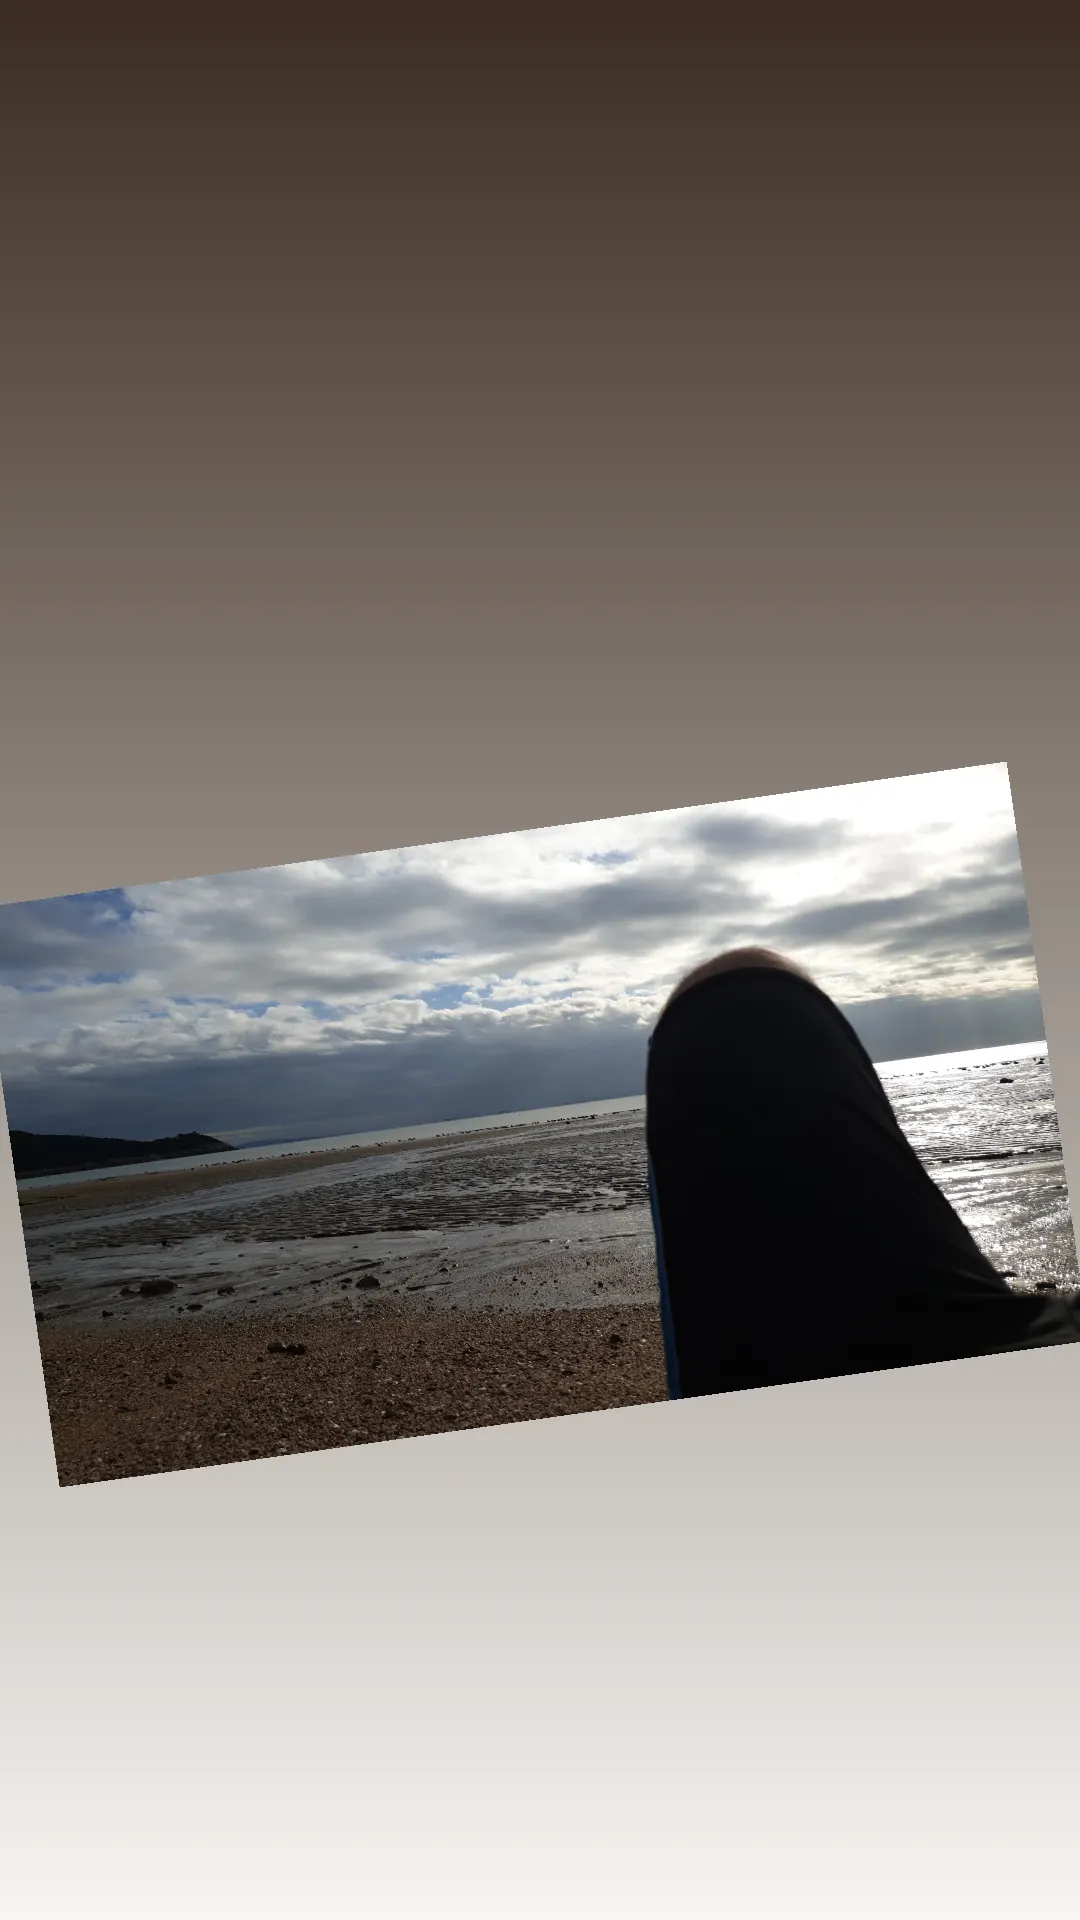

### Fig 1 Swim at Eurwangni Beach

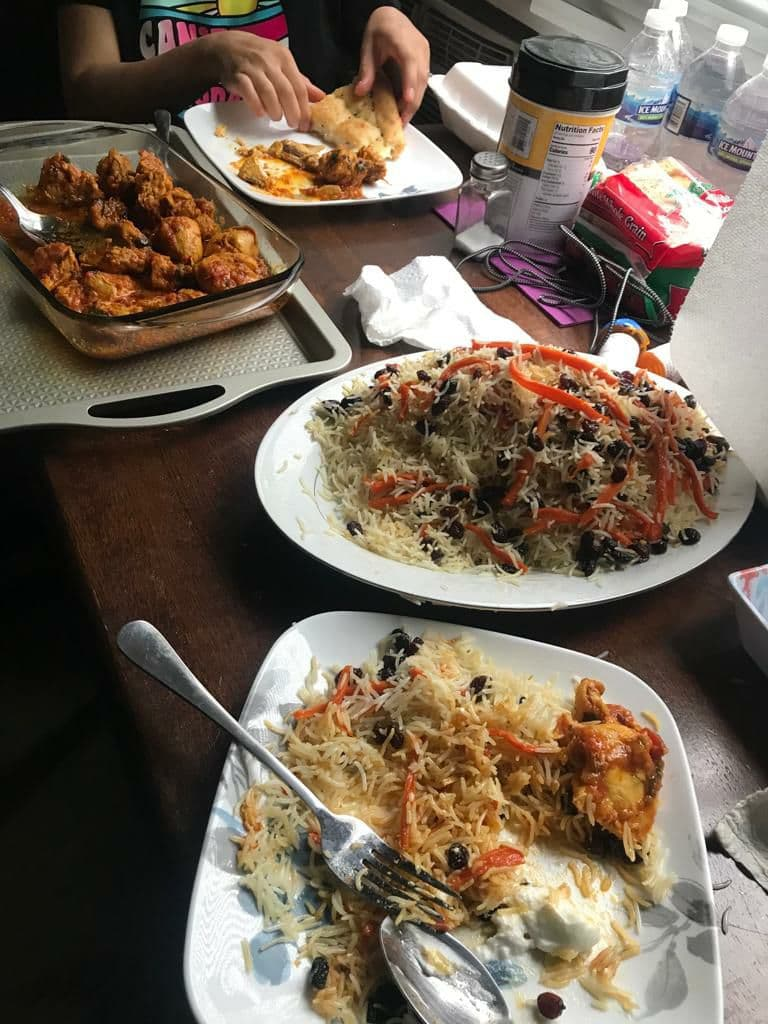

### Fig 2 Dinner with new person

### HC Appendix ###

#designthinking: This entire assignment was based on the prospects of consistently going through and revising my code in order to account for the failures that arise with the test cases. Furthermore, by identifying possible new avenues in a creative manner, it was important to identify the necessary aspects to focus on to.
#constraints: Looking at the constraints of the entire algorithm in terms of its ability to solve task scheduling in a simplistic implementation, it was important to identify the possible assumptions that I needed to have for the algorithm itself to work. Furthermore, this was important in analyzing the shortcomings.
#algorithms: I very clearly use complex implementations of original algorithmic strategies in order to come up with code that satisfies the requirements.

In [ ]:
inputs = []
for i in range(100):
    dummy = random.randint(1,11)
    duration = random.randint(1,61)
    inputs.append(Task(i, f'{i}', duration, [], dummy))
    